In [32]:
import pandas as pd
import numpy as np

#Plots and graphs
import matplotlib.pyplot as plt  
import seaborn as sns

#Model building
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

#Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Binomial Logistic Regression on wilt dastaset

In [2]:
%cd E:\ML1 datasets\DataSets\wilt

E:\ML1 datasets\DataSets\wilt


In [3]:
wtrain = pd.read_csv('training.csv')
wtest =  pd.read_csv('testing.csv')
wtrain.shape,wtest.shape

((4339, 6), (500, 6))

In [4]:
wtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       4339 non-null   object 
 1   GLCM_pan    4339 non-null   float64
 2   Mean_Green  4339 non-null   float64
 3   Mean_Red    4339 non-null   float64
 4   Mean_NIR    4339 non-null   float64
 5   SD_pan      4339 non-null   float64
dtypes: float64(5), object(1)
memory usage: 203.5+ KB


In [5]:
dataset = pd.concat([wtrain, wtest])
dataset.head()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,w,120.362774,205.500000,119.395349,416.581395,20.676318
1,w,124.739583,202.800000,115.333333,354.333333,16.707151
2,w,134.691964,199.285714,116.857143,477.857143,22.496712
3,w,127.946309,178.368421,92.368421,278.473684,14.977453
4,w,135.431548,197.000000,112.690476,532.952381,17.604193


In [8]:
dataset.shape

(4839, 6)

In [9]:
dataset.describe()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
count,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000
mean,126.855547,231.412658,116.305331,525.800301,24.482007
std,13.450516,63.264941,62.005622,156.579297,10.726997
min,0.000000,117.210526,50.578947,86.500000,0.000000
25%,118.758944,203.896429,91.527009,415.448161,17.679972
50%,127.481872,219.260870,101.631579,518.657143,23.198396
75%,134.947789,239.860577,116.969687,635.133450,29.326445
max,183.281250,1848.916667,1594.583333,1597.333333,156.508431


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4839 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       4839 non-null   object 
 1   GLCM_pan    4839 non-null   float64
 2   Mean_Green  4839 non-null   float64
 3   Mean_Red    4839 non-null   float64
 4   Mean_NIR    4839 non-null   float64
 5   SD_pan      4839 non-null   float64
dtypes: float64(5), object(1)
memory usage: 264.6+ KB


In [11]:
ds_train, ds_test = train_test_split(dataset, test_size=0.2, random_state=0)
ds_train.shape, ds_test.shape

((3871, 6), (968, 6))

In [12]:
ds_corr_matrix = ds_train.corr()
ds_corr_matrix

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
GLCM_pan,1.000000,-0.118071,-0.106139,-0.087325,-0.043544
Mean_Green,-0.118071,1.000000,0.967608,0.278860,0.229412
Mean_Red,-0.106139,0.967608,1.000000,0.177467,0.231646
Mean_NIR,-0.087325,0.278860,0.177467,1.000000,0.154839
SD_pan,-0.043544,0.229412,0.231646,0.154839,1.000000


<AxesSubplot:>

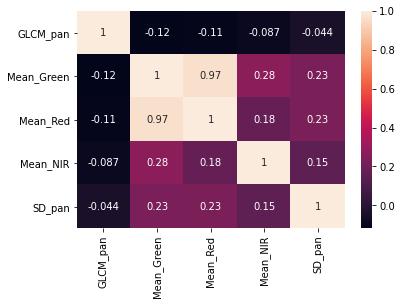

In [13]:
sns.heatmap(ds_corr_matrix,annot=True)

In [14]:
y=ds_train["class"]
y_test=ds_test["class"]
ds_train = ds_train.drop('class',axis=1)

In [15]:
y.shape

(3871,)

In [16]:
ds_train.shape

(3871, 5)

In [17]:
clf = LogisticRegression(random_state=0).fit(ds_train, y)

In [18]:
clf

LogisticRegression(random_state=0)

In [19]:
ds_test = ds_test.drop('class',axis=1)

In [20]:
ds_test.shape

(968, 5)

In [21]:
y_pred = clf.predict(ds_test)

In [22]:
clf.score(ds_test, y_test)

0.9617768595041323

In [ ]:
#logreg.score(ds_test,y_test)

# Multinomial Logistic Regression on abalone dataset

In [23]:
ds = pd.read_csv('abalone.data',names=['Sex', 'length', 'diameter','height','Whole weight','Shucked weight','Viscera weight','Shell weight','rings'])
ds.head()

,Sex,length,diameter,height,Whole weight,Shucked weight,Viscera weight,Shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [25]:
ds1=pd.cut(ds['rings'], bins=3)

In [27]:
ds['Age group']=ds1

In [28]:
ds['Age group'].unique()

[(10.333, 19.667], (0.972, 10.333], (19.667, 29.0]]
Categories (3, interval[float64]): [(0.972, 10.333] < (10.333, 19.667] < (19.667, 29.0]]

In [30]:
x = ds.iloc[:, [0,1,2,3,4,5,6,7]].values
y = ds['Age group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [ ]:
#ds_train, ds_test = train_test_split(ds, test_size=0.2, random_state=0)
#ds_train.shape, ds_test.shape

In [33]:
label_encoder = LabelEncoder()
label_encoder.fit(x_train[:,0])
x_train[:,0]=label_encoder.transform(x_train[:,0])
x_test[:,0] = label_encoder.transform(x_test[:,0])
y_train=label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [34]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:
logreg = LogisticRegression(random_state = 10, solver='saga', multi_class='multinomial')
logreg.fit(x_train, y_train)

c:\users\sharon\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(multi_class='multinomial', random_state=10, solver='saga')

In [51]:
y_pred = logreg.predict(x_test)
# Predict probabilities
y_pred_prob=logreg.predict_proba(x_test)

<AxesSubplot:>

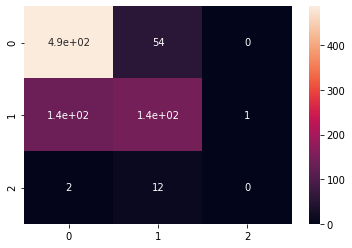

In [52]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,annot=True)

In [53]:
logreg.score(x_test, y_test)

0.7559808612440191